<a href="https://colab.research.google.com/github/Arijit02/Quantum-Computing/blob/master/MitigatingNoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('3052c105ce24e73d6113e54bce4fb76a634cadcf72ab7981d682276e200e882b19f71ee1a91cdb7685d84e515b0c5eb98687ef6904e44728b464a9bde17fca6b')

In [ ]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

In [ ]:
from qiskit.tools.monitor import job_monitor

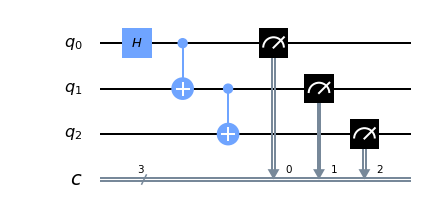

In [ ]:
qbits = 3
cbits = 3

circuit = QuantumCircuit(qbits, cbits)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0, 1, 2], [0, 1, 2])
circuit.draw(output='mpl')

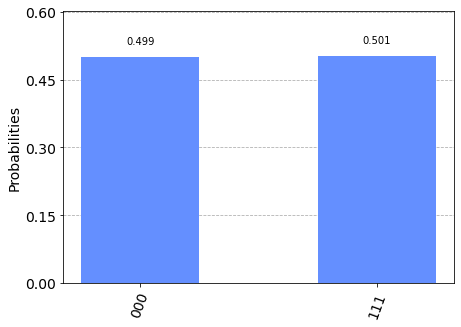

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend=simulator, shots=1024).result()
sim_counts = sim_result.get_counts(circuit)
plot_histogram(sim_counts)

In [ ]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-06-18 11:55:25,914: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

5eeb56d7ae9269001a7d355c
Job Status: job has successfully run


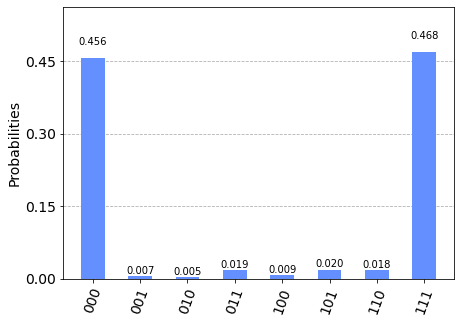

In [ ]:
provider = IBMQ.get_provider('ibm-q')
device = provider.get_backend('ibmqx2')
job = execute(circuit, backend=device, shots=1024)
print(job.job_id())
job_monitor(job)
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)

In [ ]:
cal_circuits, state_labels = complete_meas_cal(qr=circuit.qregs[0], circlabel='measerrormitigationcal')

In [ ]:
len(cal_circuits)

8

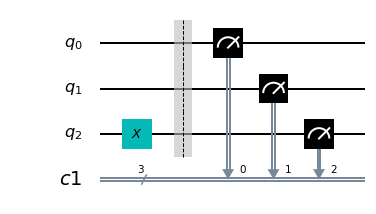

In [ ]:
cal_circuits[4].draw(output='mpl')

In [ ]:
cal_job = execute(cal_circuits, backend=device, shots=1024)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

5eeb5657fdd19d001bceb5c2
Job Status: job has successfully run


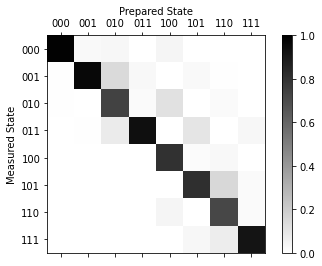

In [ ]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_fitter.plot_calibration()
meas_filter = meas_fitter.filter

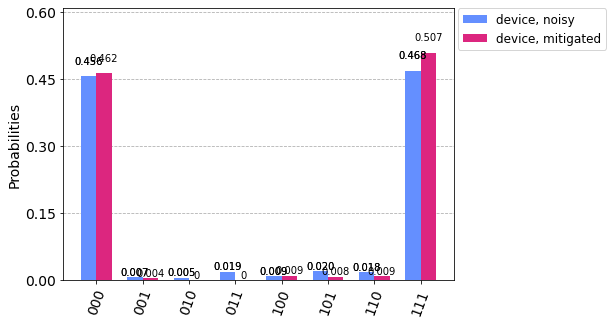

In [ ]:
mitigated_results = meas_filter.apply(result)
mitigated_counts = mitigated_results.get_counts(circuit)
plot_histogram([counts, mitigated_counts], legend=['device, noisy', 'device, mitigated'])

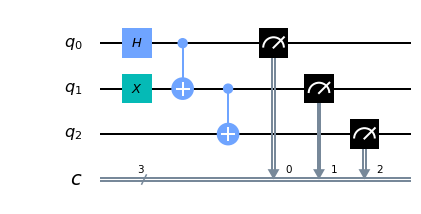

In [ ]:
qbits_2 = 3
cbits_2 = 3

circuit_2 = QuantumCircuit(qbits_2, cbits_2)
circuit_2.x(1)
circuit_2.h(0)
circuit_2.cx(0, 1)
circuit_2.cx(1, 2)
circuit_2.measure([0, 1, 2], [0, 1, 2])
circuit_2.draw(output='mpl')

In [ ]:
device_job = execute(circuit_2, backend=device, shots=1024)
print(device_job.job_id())
job_monitor(device_job)
device_result = device_job.result()
device_counts = device_result.get_counts(circuit_2)

5eeb58cccadff2001a6d7d93
Job Status: job has successfully run


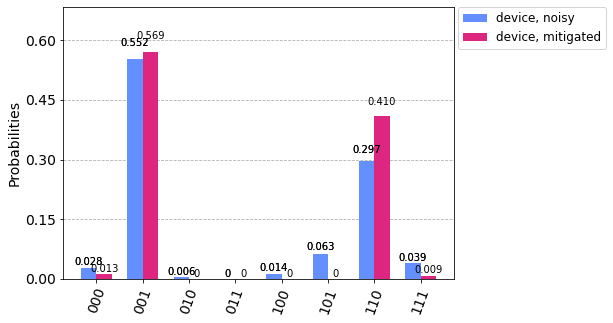

In [ ]:
mitigated_results = meas_filter.apply(device_result)
mitigated_counts = mitigated_results.get_counts(circuit_2)
plot_histogram([device_counts, mitigated_counts], legend=['device, noisy', 'device, mitigated'])